# Load packages

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split

import pandas as pd, numpy as np
from patsy import dmatrices, dmatrix, demo_data

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.cross_validation import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import snowball
from nltk.tag import pos_tag
from nltk.tokenize import WordPunctTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

import os
from scipy.cluster.hierarchy import fcluster

import requests
from scrapy.selector import Selector
from scrapy.http import HtmlResponse

from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import scipy.stats as stats
import pandas as pd
from sklearn.neighbors import KernelDensity

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from nltk.corpus import stopwords

import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

from sqlalchemy import create_engine

from sklearn.linear_model import ElasticNet
#for retina display only
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from datetime import timedelta

import prettyplotlib as ppl
import datetime as dt

# San Francisco Data

In [2]:
#San Francisco data
san_francisco_calendar = pd.read_csv('./datasets/capstone_data_airbnb/san_francisco_california/calendar.csv.gz')
san_francisco_listings_csv = pd.read_csv('./datasets/capstone_data_airbnb/san_francisco_california/listings.csv')
san_francisco_listings_gz = pd.read_csv('./datasets/capstone_data_airbnb/san_francisco_california/listings.csv.gz')
san_francisco_neigh = pd.read_csv('./datasets/capstone_data_airbnb/san_francisco_california/neighbourhoods.csv')
san_francisco_reviews = pd.read_csv('./datasets/capstone_data_airbnb/san_francisco_california/reviews.csv')
san_francisco_reviews_gz = pd.read_csv('./datasets/capstone_data_airbnb/san_francisco_california/reviews.csv.gz')

# Cleaned Data for EDA

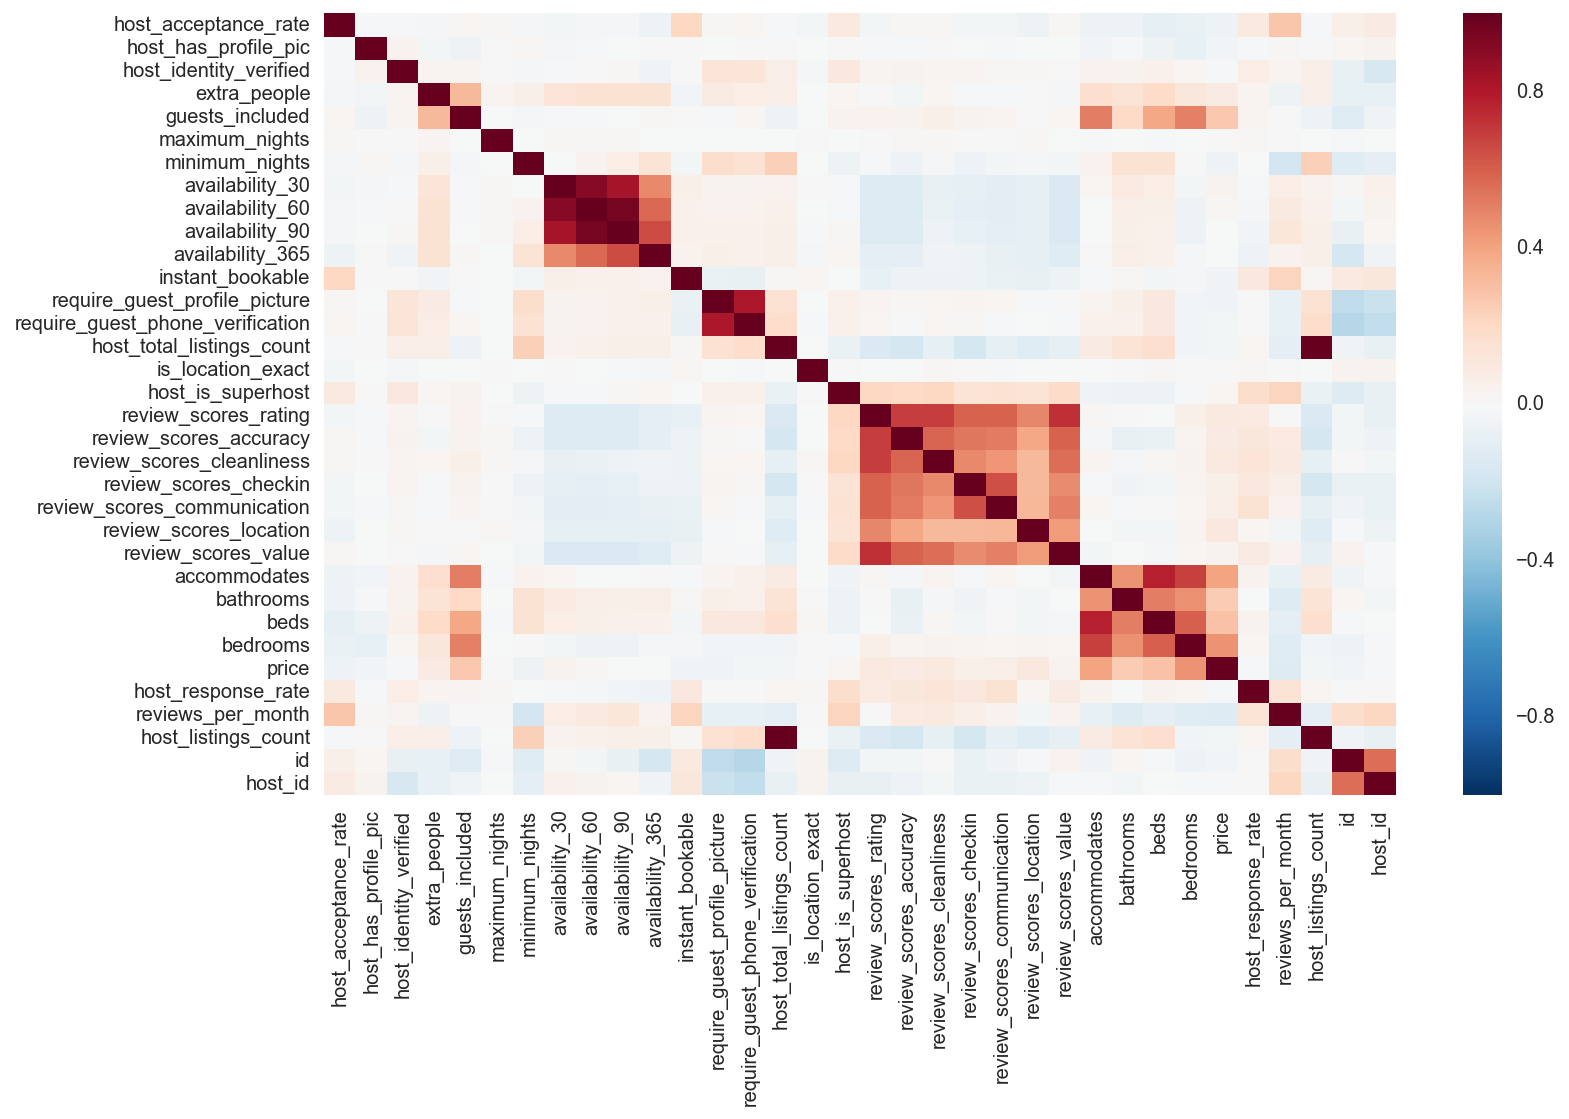

In [386]:
#This function cleans the data
def cleaning(location_df):
    
    location = location_df[['host_acceptance_rate', 'host_has_profile_pic', 'host_identity_verified',
                                'extra_people','guests_included', 'maximum_nights', 'minimum_nights',
                                'availability_30', 'availability_60','availability_90','availability_365',
                                'instant_bookable','cancellation_policy','require_guest_profile_picture',
                                'require_guest_phone_verification', 'host_total_listings_count',
                                'is_location_exact','room_type', 'host_is_superhost','review_scores_rating',
                                'review_scores_accuracy','review_scores_cleanliness',
                                'review_scores_checkin','review_scores_communication',
                                'review_scores_location','review_scores_value','accommodates','bathrooms',
                                'beds','bedrooms','price','host_response_rate','reviews_per_month', 
                                'host_listings_count','id','host_name','host_id','neighbourhood']]


    #Converting price
    location.price = location.price.apply(lambda x: str(x))
    location.price = location.price.apply(lambda x: x.replace("$",""))
    location.price = location.price.apply(lambda x: x.replace(",",""))
    location.price = location.price.apply(lambda x: float(x))

    #Converting percentage
    location.host_response_rate = location.host_response_rate.apply(lambda x: str(x))
    location.host_response_rate =  location.host_response_rate.apply(lambda x: x.replace("%",""))
    location.host_response_rate = location.host_response_rate.apply(lambda x: np.NaN if x =='nan' else float(x))

    #Converting extra people
    location.extra_people = location.extra_people.map(lambda x: float(x.replace("$","")))

    #Converting host acceptance rate
    location.host_acceptance_rate = location.host_acceptance_rate.apply(lambda x: str(x))
    location.host_acceptance_rate = location.host_acceptance_rate.apply(lambda x: float(x.replace("%","")))

    #Cleaning and converting True and False 
    location.host_has_profile_pic = location.host_has_profile_pic.apply(lambda x: 1 if x == 't' else 0 if x =='f' else x)
    location.host_identity_verified = location.host_identity_verified.apply(lambda x: 1 if x == 't' else 0 if x =='f' else x)
    location.instant_bookable = location.instant_bookable.apply(lambda x: 1 if x == 't' else 0 if x =='f' else x)
    location.require_guest_profile_picture = location.require_guest_profile_picture.apply(lambda x: 1 if x == 't' else 0\
                                                                                              if x =='f' else x)
    location.require_guest_phone_verification = location.require_guest_phone_verification.apply(lambda x: 1 if x == 't'\
                                                                                                    else 0 if x =='f' else x)
    location.is_location_exact = location.is_location_exact.apply(lambda x: 1 if x == 't' else 0 if x =='f' else x)
    location.host_is_superhost = location.host_is_superhost.apply(lambda x: 1 if x == 't' else 0 if x =='f' else x)

    #Drop all null Nan values
    location = location.dropna()
    
    return location

sf = cleaning(san_francisco_listings_gz) #ADD LOCATION HERE!!!

plt.figure(figsize=(12,7))
sns.heatmap(sf.corr())

In [443]:
san_francisco_calendar.tail()

listing_id       date available  price  month  day
2565580     8261649 2016-10-26         t   72.0     10   26
2565581     8261649 2016-10-27         t   72.0     10   27
2565582     8261649 2016-10-28         t   72.0     10   28
2565583     8261649 2016-10-29         t   72.0     10   29
2565584     8261649 2016-10-30         t   72.0     10   30

### Converted Calendar data to date time

In [157]:
def calendar_cleaning(location): 
    location.date = pd.to_datetime(location.date)

    #Converting price
    location.price = location.price.apply(lambda x: str(x))
    location.price = location.price.apply(lambda x: x.replace("$",""))
    location.price = location.price.apply(lambda x: x.replace(",",""))
    location.price = location.price.apply(lambda x: float(x))

    location['month'] = location.date.dt.month
    location['day'] = location.date.dt.day

    location = location[['listing_id','date','month','day','available','price']]
    location = location.rename(columns={'listing_id':'id'})
    
    location = location.dropna()
    
    return location

sf_calendar = calendar_cleaning(san_francisco_calendar)

# Total price listings per month

month       price
0       1  27390755.0
1       2  27123047.0
2       3  27442449.0
3       4  27862950.0
4       5  28026948.0
5       6  28420314.0
6       7  30743859.0
7       8  32245856.0
8       9  33053037.0
9      10  36045306.0
10     11  17640947.0
11     12  23323117.0

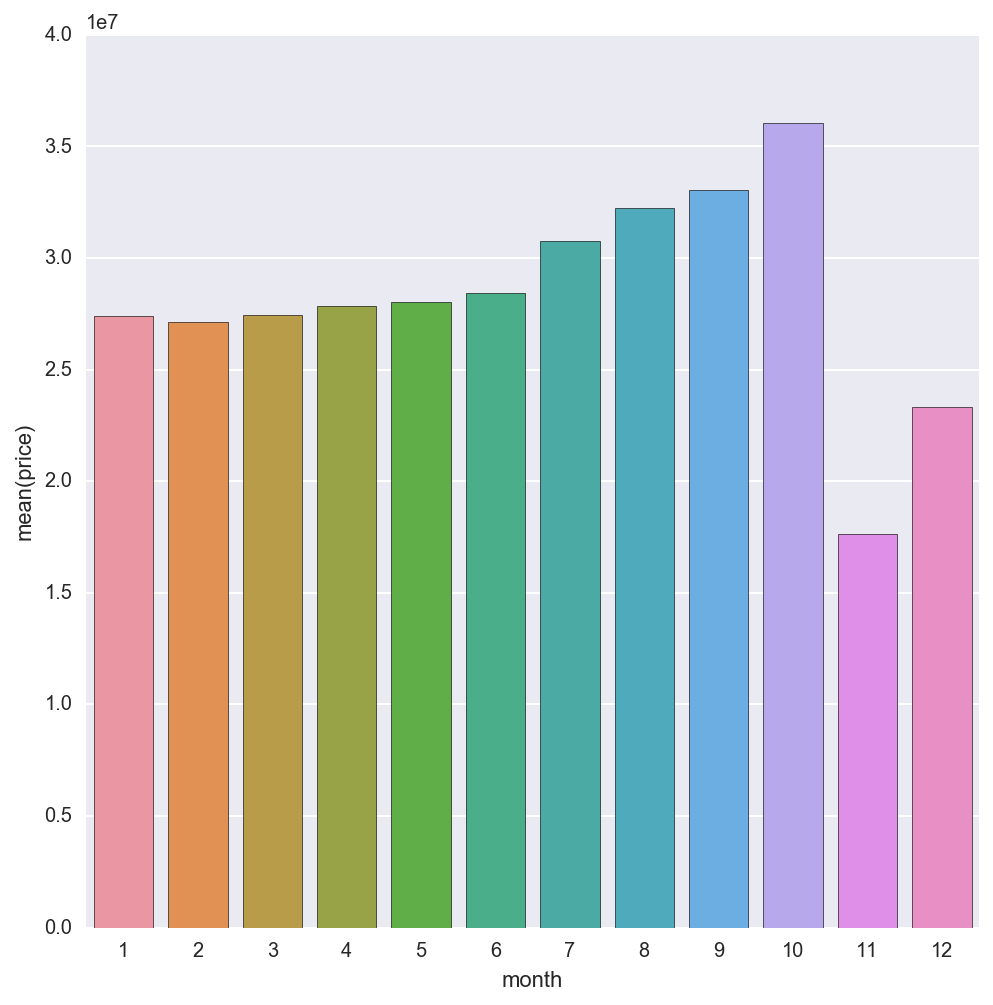

In [368]:
plt.figure(figsize=(8,8))
sf_calendar_available = sf_calendar[sf_calendar['available']=='t']
sf_month_vs_price = sf_calendar_available[['month','price']].groupby(['month']).sum().reset_index()
sns.barplot(x = 'month', y ='price', data=sf_month_vs_price)

sf_month_vs_price

### Created masks for both Superhosts and Non Superhosts

In [388]:
superhost_mask = sf['host_is_superhost'] == 1
non_superhost_mask = sf['host_is_superhost'] == 0

### Amount of Super hosts vs. Non Super hosts

In [389]:
sf_superhosts = sf[superhost_mask]
sf_non_superhosts = sf[non_superhost_mask]

print sf.shape
print "Total amount of NON superhosts:" ,sf_non_superhosts.shape[0]
print "Total amount of superhosts:",sf_superhosts.shape[0]
print "Percentage of superhosts in SF:" ,723/float(723 + 3924)

(4647, 38)
Total amount of NON superhosts: 3924
Total amount of superhosts: 723
Percentage of superhosts in SF: 0.155584247902


# CHECKPOINT!!!!!!!!!!!

In [390]:
x =sf[sf['host_is_superhost'] == 1]
x[['host_total_listings_count','host_name','price']].sort_values(by='price',ascending=False)
print sum(x.price * 0.06 * 10)
print 747/float(sum(x.price * 0.06 * 10))

print sum(x.price * 0.12 * 10)

92085.6
0.00811201751414
184171.2


# Top 10 Super Host listings count

host_id        host_name  host_total_listings_count
5       23278  Zain And Duncan                          9
195   2711732            Keith                          5
188   2544752             Fran                          5
156   1877737   Cami And Carol                          5
460  15357373             Ding                          4
412  10829039          Viviane                          4
25     145258             Kepa                          4
193   2682061             Jose                          4
151   1726785              Sid                          3
519  22338989          Jeffrey                          3

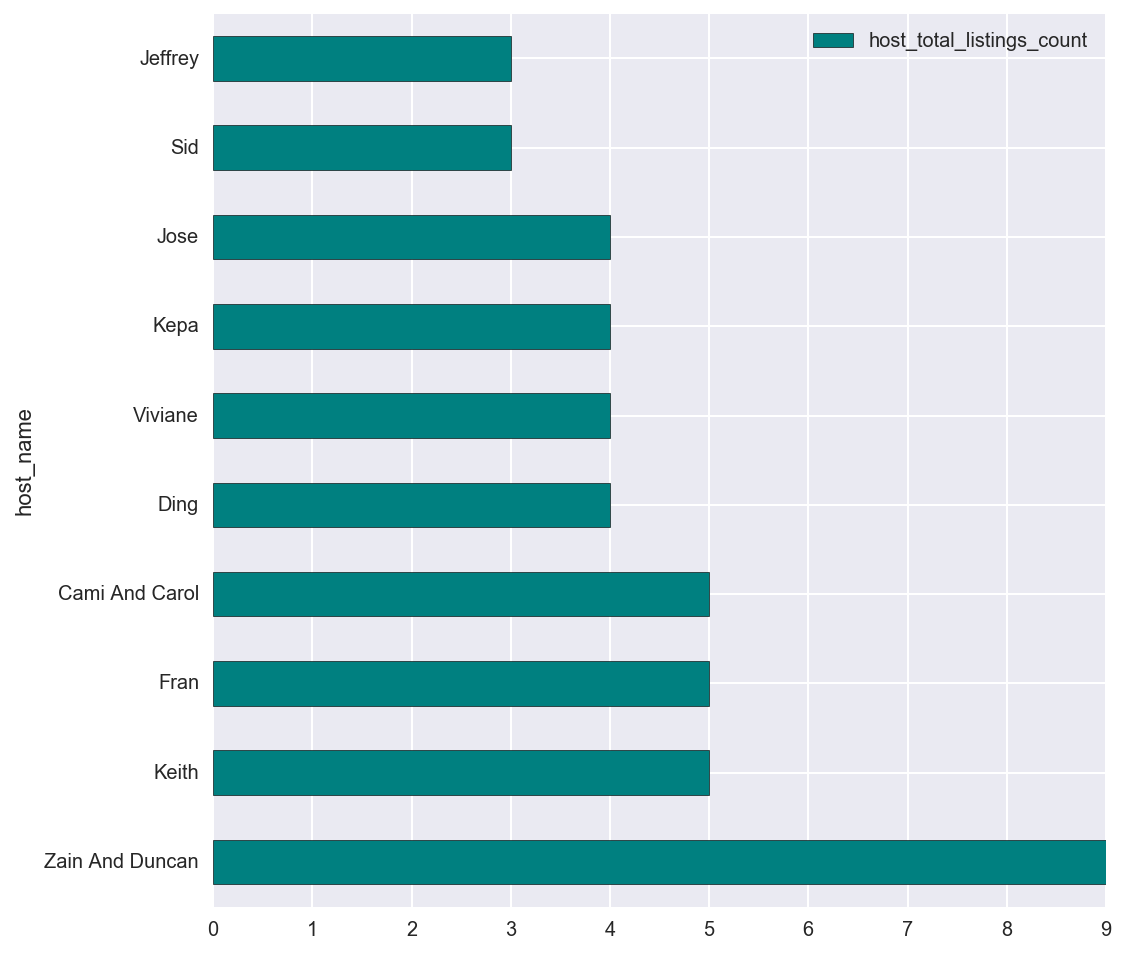

In [391]:
superhost_vs_listings = sf_superhosts[['host_id','host_name','host_total_listings_count']].groupby(['host_id','host_name']).count().reset_index().sort_values(by='host_total_listings_count', ascending=False).head(10)
superhost_vs_listings.plot(kind='barh',x='host_name',y='host_total_listings_count',figsize=(8,8),color='teal')
superhost_vs_listings

# Top 10 Non Super Host listings count

host_id         host_name  host_total_listings_count
31       38836            Bernat                         27
1588   7206100              Gatz                         27
33       43806               Vic                         26
1471   6346492              Dana                         21
1244   4581592              Erik                         17
1924  11186281  Francesca & Team                         17
2199  17042045            Jordan                         16
460    1091811              Sean                         15
2391  22931450             Sarah                         15
93      127367           Annette                         15

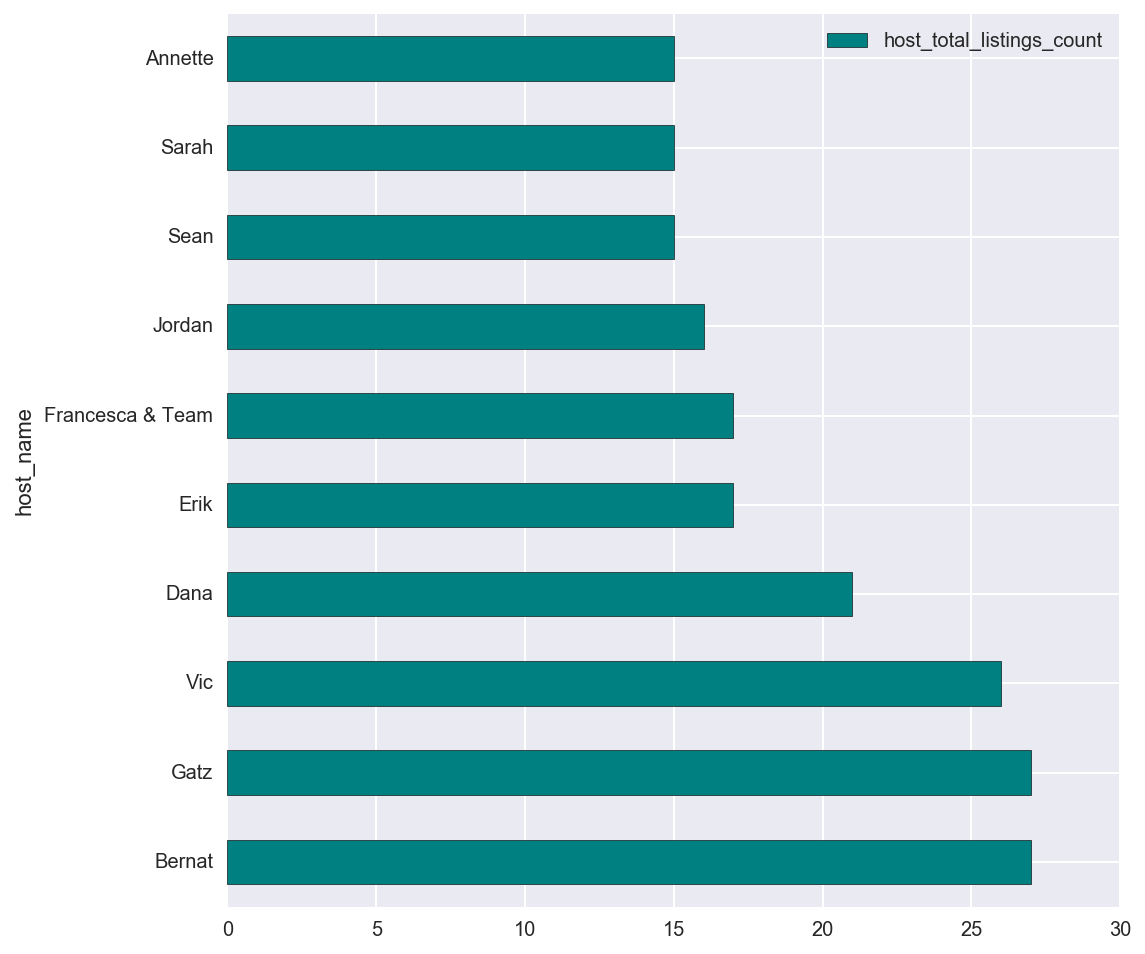

In [392]:
nonsuperhost_vs_listings = sf_non_superhosts[['host_id','host_name','host_total_listings_count']].groupby(['host_id','host_name']).count().reset_index().sort_values(by='host_total_listings_count', ascending=False).head(10)
nonsuperhost_vs_listings.plot(kind='barh',x='host_name',y='host_total_listings_count',figsize=(8,8),color='teal')
nonsuperhost_vs_listings

# Super Hosts Total Price 

host_id       host_name   price
72     642706             Sam  1690.0
306   6230790            Gary  1680.0
188   2544752            Fran  1610.0
209   3080489            Beth  1495.0
395  10081093         Cameron  1448.0
193   2682061            Jose  1396.0
460  15357373            Ding  1295.0
217   3258337       Elizabeth  1185.0
332   7250374          Stuart  1150.0
156   1877737  Cami And Carol  1005.0

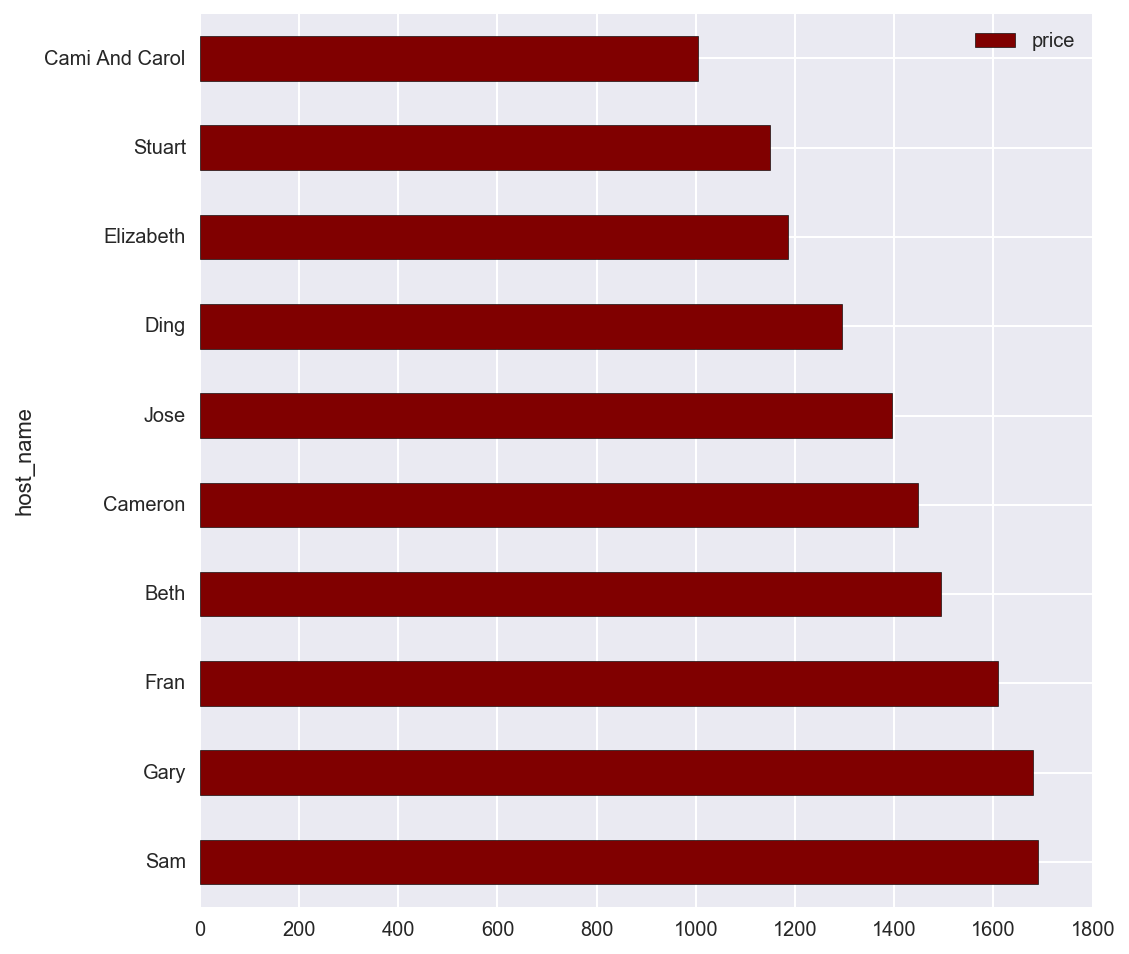

In [401]:
superhost_vs_price = sf_superhosts[['host_id','host_name','price']].groupby(['host_id','host_name']).sum().reset_index().sort_values(by='price', ascending=False).head(10)
superhost_vs_price.plot(kind='barh',x='host_name',y='price',figsize=(8,8),color='maroon')
superhost_vs_price

# Non Super Host Total Price

host_id     host_name    price
1829  10073905         Bixby  10000.0
31       38836        Bernat   6986.0
1471   6346492          Dana   3874.0
512    1257432       Rebecca   2925.0
460    1091811          Sean   2802.0
93      127367       Annette   2730.0
2572  30857973     Travel En   2480.0
386     837274  Jay And Tina   2450.0
2388  22847734          Paul   2400.0
2414  23581581         Logan   2298.0

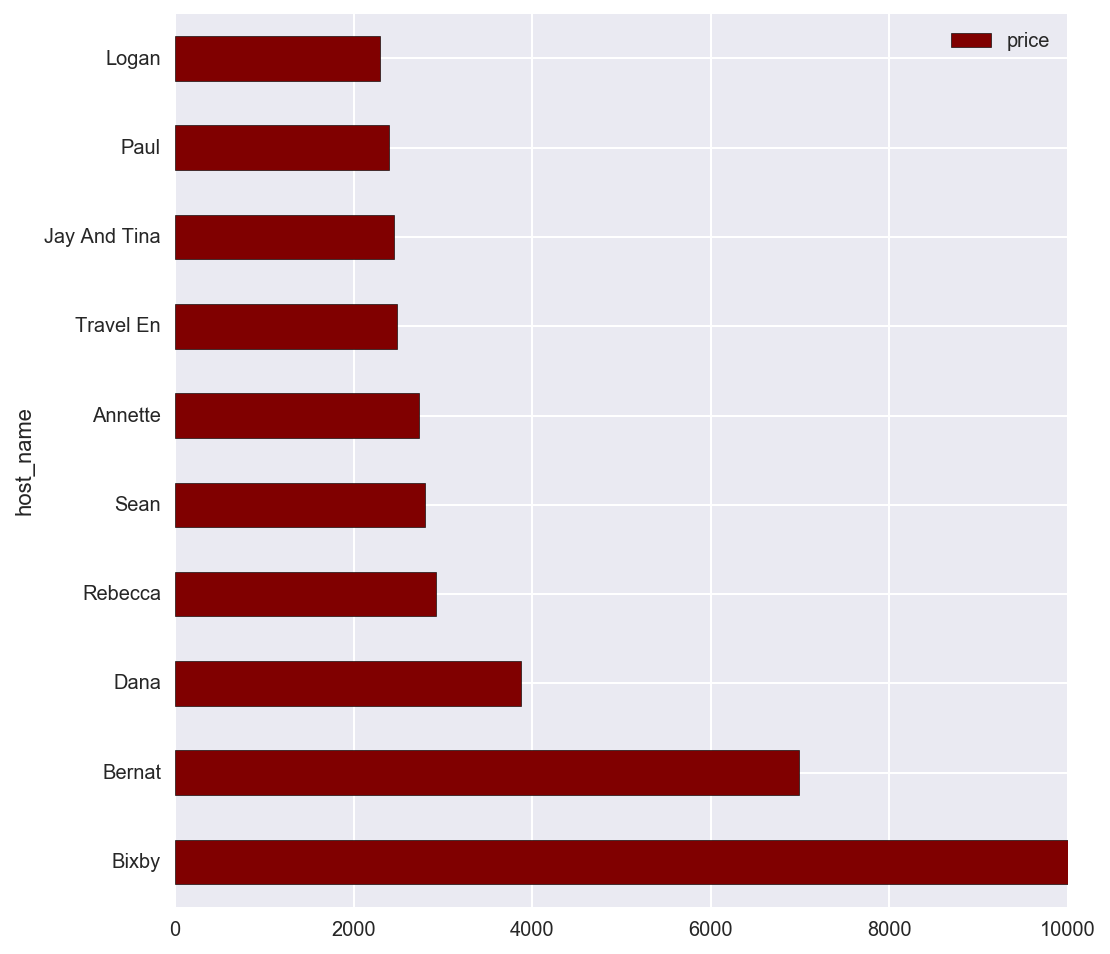

In [402]:
nonsuperhost_vs_price = sf_non_superhosts[['host_id','host_name','price']].groupby(['host_id','host_name']).sum().reset_index().sort_values(by='price', ascending=False).head(10)
nonsuperhost_vs_price.plot(kind='barh',x='host_name',y='price',figsize=(8,8),color='maroon')
nonsuperhost_vs_price

In [395]:
total_superhost_price/total_host_price

id                           0.000008
price                        0.174718
host_total_listings_count    8.404848
availability_365             0.181948
dtype: float64

In [396]:
total_nonsuperhost_price/total_host_price

id                             0.000111
price                          2.321394
host_total_listings_count    111.671100
availability_365               2.417460
dtype: float64

# Superhosts Average Price per Neighborhood

neighbourhood       price
30        Pacific Heights  389.000000
39            South Beach  385.000000
6              Cow Hollow  362.500000
22                 Marina  317.882353
47            West Portal  288.000000
5             Cole Valley  282.250000
45           Union Square  280.000000
37                   SoMa  278.565217
41         Telegraph Hill  271.461538
25               Nob Hill  266.000000
16         Haight-Ashbury  254.850000
38                   Soma  249.000000
36           Russian Hill  248.666667
0            Alamo Square  244.250000
26             Noe Valley  242.358974
13      Fisherman's Wharf  225.000000
48  Western Addition/NOPA  224.745098
33           Potrero Hill  219.921053
21           Lower Haight  219.217391
27            North Beach  217.833333
4            Civic Center  217.500000
3               Chinatown  213.333333
15              Glen Park  211.307692
17           Hayes Valley  209.454545
43             The Castro  205.640625
23       Mission District  203.080000
35      Richmond District  191.047619
44             Twin Peaks  189.733333
34       Presidio Heights  184.750000
19           Inner Sunset  182.666667
10        Duboce Triangle  174.880000
8         Diamond Heights  172.333333
29           Outer Sunset  172.045455
9                Dogpatch  169.000000
2          Bernal Heights  163.173913
14            Forest Hill  152.333333
31               Parkside  150.000000
12     Financial District  145.000000
42             Tenderloin  145.000000
40              Sunnyside  142.636364
1                 Bayview  136.428571
11              Excelsior  136.111111
20              Lakeshore  134.833333
24        Mission Terrace  111.333333
18              Ingleside  110.500000
32                Portola  110.000000
7          Crocker Amazon  102.500000
28              Oceanview   96.500000
46      Visitacion Valley   86.333333

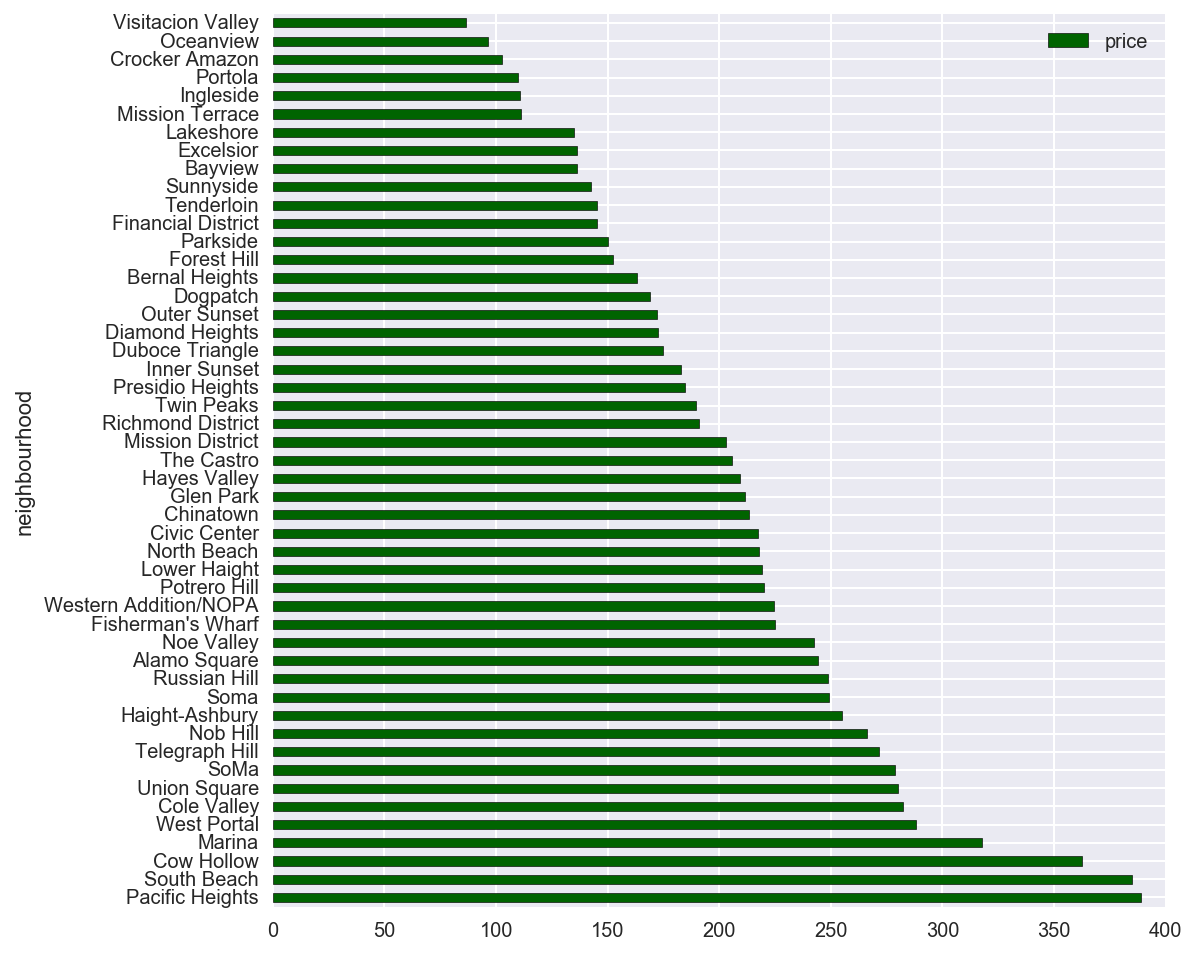

In [423]:
superhost_vs_neigh = sf_superhosts[['neighbourhood','price']].groupby(['neighbourhood']).mean().reset_index().sort_values(by='price', ascending=False)
superhost_vs_neigh.plot(kind='barh',x='neighbourhood',y='price',figsize=(8,8),color='darkgreen')
superhost_vs_neigh

# Non Superhosts Average Price per Neighborhood

neighbourhood       price
18            Forest Hill  402.111111
6             Cole Valley  397.424242
44              Sea Cliff  350.000000
16     Financial District  348.800000
28            Mission Bay  308.333333
36        Pacific Heights  282.713178
46                   Soma  279.666667
43           Russian Hill  277.306667
27                 Marina  271.936842
7              Cow Hollow  257.224138
17      Fisherman's Wharf  241.600000
47            South Beach  232.894737
32             Noe Valley  225.950276
0            Alamo Square  225.858974
52             The Castro  225.190476
20         Haight-Ashbury  224.297030
11               Dogpatch  220.722222
31               Nob Hill  217.130137
13        Duboce Triangle  212.274194
4               Chinatown  209.400000
33            North Beach  208.025000
10        Diamond Heights  202.700000
50         Telegraph Hill  197.724638
48              Sunnyside  197.117647
53             Twin Peaks  196.206897
5            Civic Center  194.611111
21           Hayes Valley  193.338710
3          Bernal Heights  192.865497
29       Mission District  191.326990
39           Potrero Hill  189.345455
58  Western Addition/NOPA  187.994924
12               Downtown  186.100000
54           Union Square  177.900000
45                   SoMa  175.087379
23           Inner Sunset  174.847458
30        Mission Terrace  174.272727
19              Glen Park  173.882353
26           Lower Haight  172.215190
42      Richmond District  171.243119
24              Japantown  168.750000
49        Sunset District  166.000000
51             Tenderloin  163.132075
9               Daly City  162.000000
15      Fillmore District  150.000000
22              Ingleside  146.578947
1          Balboa Terrace  140.606061
38                Portola  133.500000
35           Outer Sunset  131.330508
41       Presidio Heights  127.416667
55      Visitacion Valley  124.761905
2                 Bayview  124.648148
57       Western Addition  122.666667
37               Parkside  120.568182
25              Lakeshore  116.600000
14              Excelsior  110.088889
56            West Portal  110.000000
40               Presidio  110.000000
8          Crocker Amazon  104.681818
34              Oceanview   94.464286

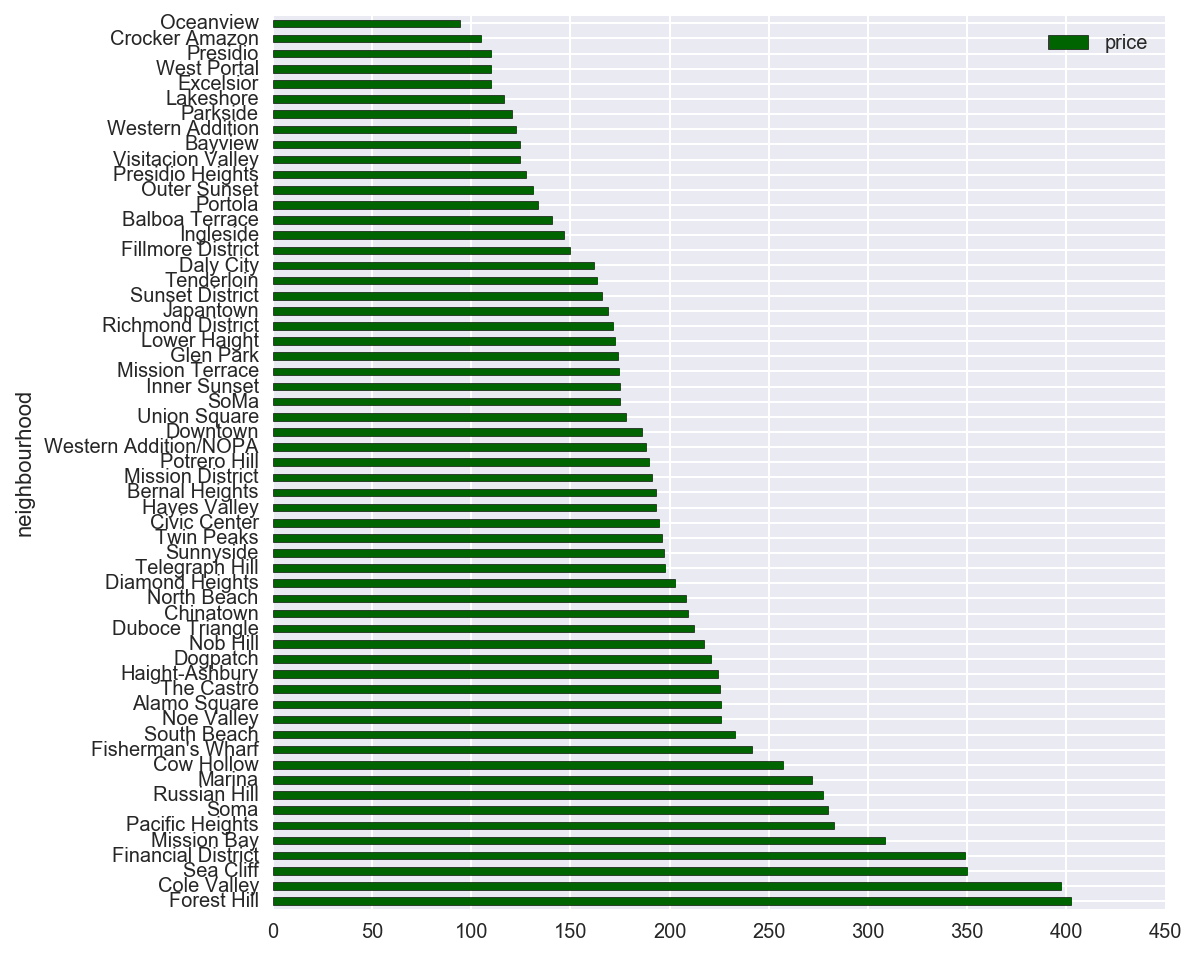

In [422]:
nonsuperhost_vs_neigh = sf_non_superhosts[['neighbourhood','price']].groupby(['neighbourhood']).mean().reset_index().sort_values(by='price', ascending=False)
nonsuperhost_vs_neigh.plot(kind='barh',x='neighbourhood',y='price',figsize=(8,8),color='darkgreen')
nonsuperhost_vs_neigh

# Superhosts listings count per neighborhood

neighbourhood  host_total_listings_count
23       Mission District                        100
43             The Castro                         64
48  Western Addition/NOPA                         51
2          Bernal Heights                         46
35      Richmond District                         42
26             Noe Valley                         39
33           Potrero Hill                         38
10        Duboce Triangle                         25
37                   SoMa                         23
21           Lower Haight                         23
29           Outer Sunset                         22
16         Haight-Ashbury                         20
25               Nob Hill                         20
30        Pacific Heights                         17
22                 Marina                         17
19           Inner Sunset                         15
44             Twin Peaks                         15
41         Telegraph Hill                         13
15              Glen Park                         13
17           Hayes Valley                         11
40              Sunnyside                         11
11              Excelsior                          9
34       Presidio Heights                          8
1                 Bayview                          7
36           Russian Hill                          6
27            North Beach                          6
24        Mission Terrace                          6
20              Lakeshore                          6
32                Portola                          4
5             Cole Valley                          4
9                Dogpatch                          4
0            Alamo Square                          4
18              Ingleside                          4
46      Visitacion Valley                          3
14            Forest Hill                          3
8         Diamond Heights                          3
3               Chinatown                          3
31               Parkside                          2
4            Civic Center                          2
6              Cow Hollow                          2
39            South Beach                          2
28              Oceanview                          2
7          Crocker Amazon                          2
13      Fisherman's Wharf                          1
42             Tenderloin                          1
45           Union Square                          1
12     Financial District                          1
47            West Portal                          1
38                   Soma                          1

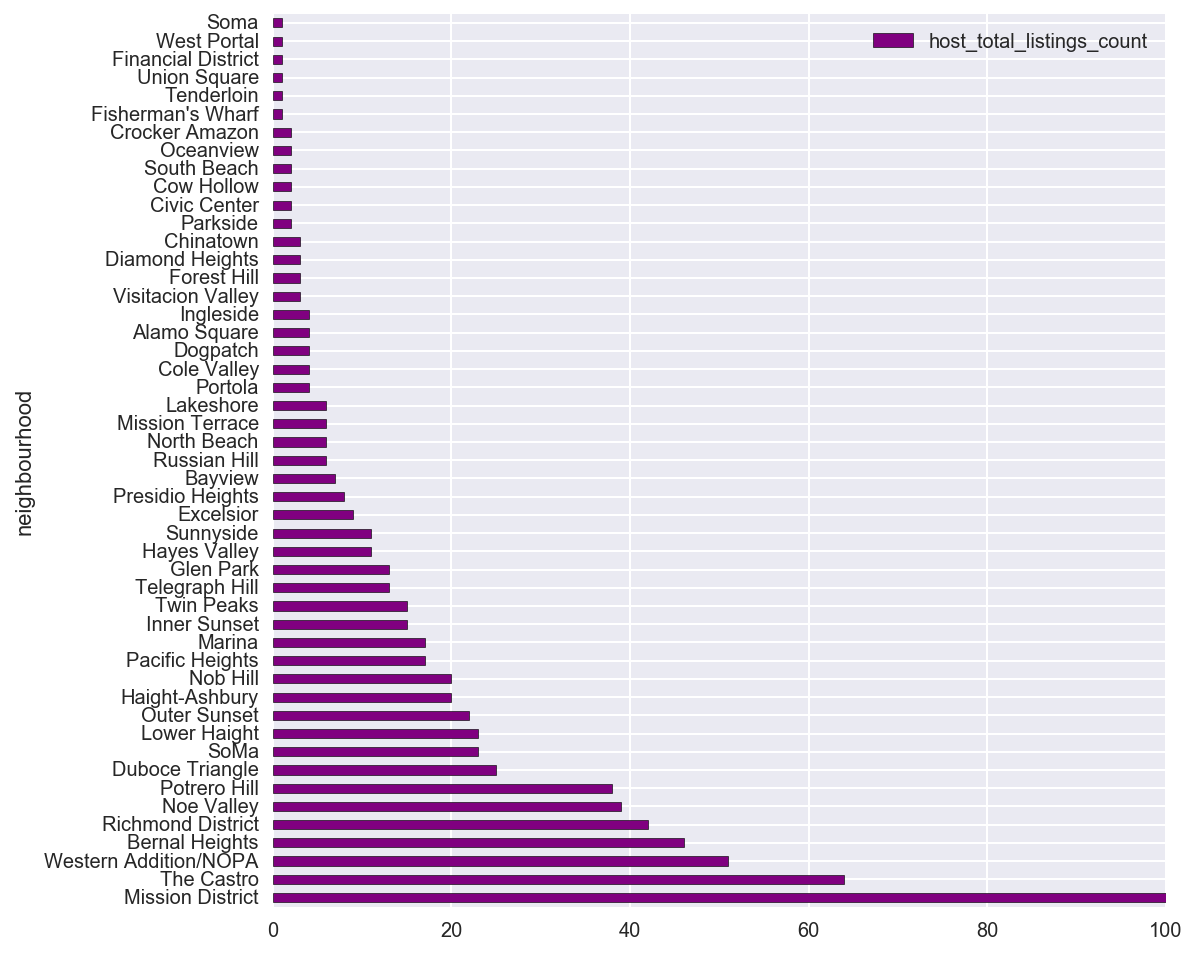

In [421]:
superhost_vs_listings = sf_superhosts[['neighbourhood','host_total_listings_count']].groupby(['neighbourhood']).count().reset_index().sort_values(by='host_total_listings_count', ascending=False)
superhost_vs_listings.plot(kind='barh',x='neighbourhood',y='host_total_listings_count',figsize=(8,8),color='purple')
superhost_vs_listings

# Non Superhosts listings count per neighborhood

neighbourhood  host_total_listings_count
29       Mission District                        578
45                   SoMa                        309
42      Richmond District                        218
58  Western Addition/NOPA                        197
32             Noe Valley                        181
3          Bernal Heights                        171
52             The Castro                        168
31               Nob Hill                        146
36        Pacific Heights                        129
35           Outer Sunset                        118
39           Potrero Hill                        110
20         Haight-Ashbury                        101
27                 Marina                         95
26           Lower Haight                         79
0            Alamo Square                         78
43           Russian Hill                         75
50         Telegraph Hill                         69
6             Cole Valley                         66
13        Duboce Triangle                         62
21           Hayes Valley                         62
23           Inner Sunset                         59
7              Cow Hollow                         58
2                 Bayview                         54
51             Tenderloin                         53
12               Downtown                         50
14              Excelsior                         45
37               Parkside                         44
33            North Beach                         40
54           Union Square                         40
47            South Beach                         38
48              Sunnyside                         34
19              Glen Park                         34
1          Balboa Terrace                         33
30        Mission Terrace                         33
53             Twin Peaks                         29
34              Oceanview                         28
4               Chinatown                         25
8          Crocker Amazon                         22
55      Visitacion Valley                         21
25              Lakeshore                         20
22              Ingleside                         19
11               Dogpatch                         18
5            Civic Center                         18
16     Financial District                         15
17      Fisherman's Wharf                         15
41       Presidio Heights                         12
10        Diamond Heights                         10
38                Portola                         10
18            Forest Hill                          9
9               Daly City                          5
24              Japantown                          4
57       Western Addition                          3
28            Mission Bay                          3
49        Sunset District                          3
46                   Soma                          3
56            West Portal                          2
44              Sea Cliff                          1
40               Presidio                          1
15      Fillmore District                          1

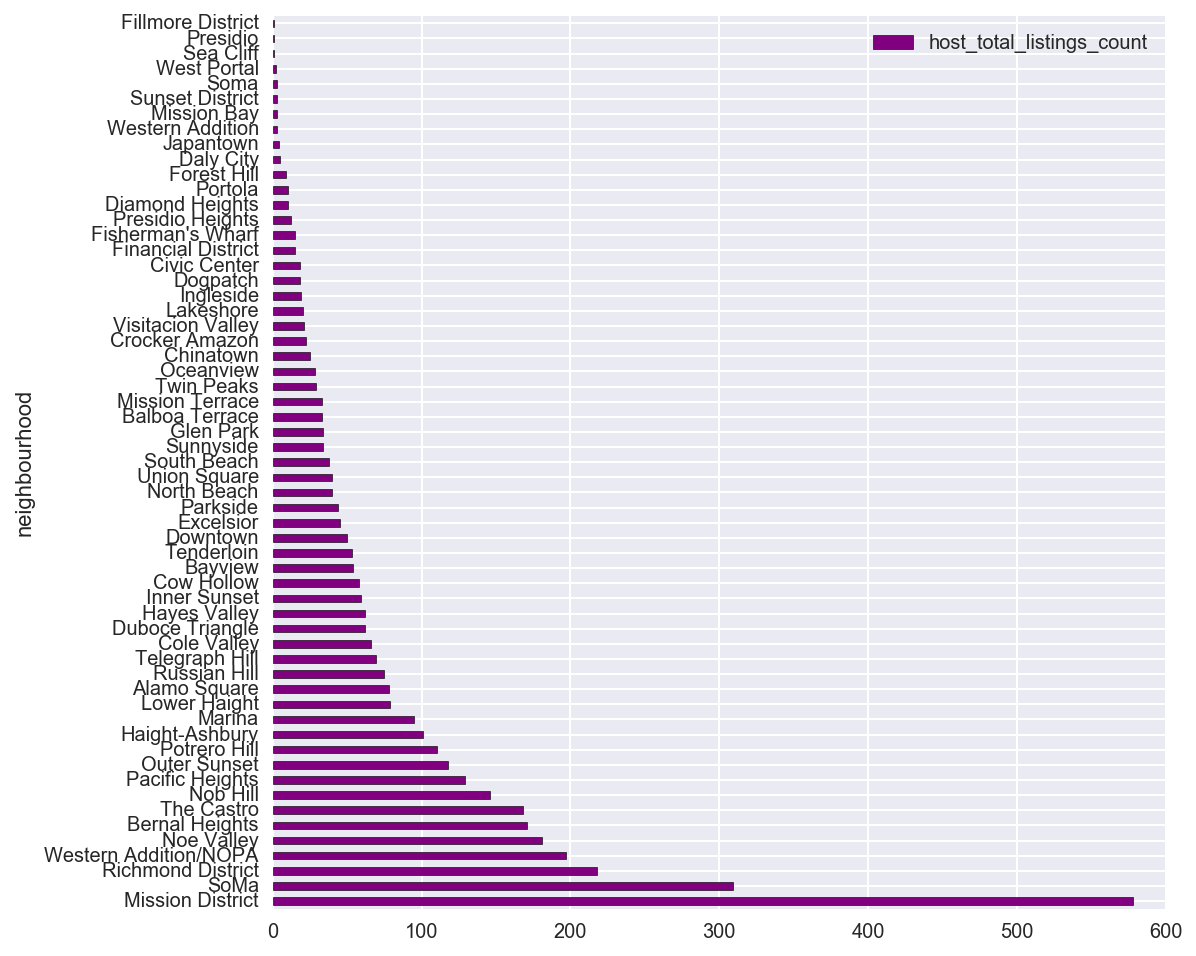

In [413]:
nonsuperhost_vs_listings = sf_non_superhosts[['neighbourhood','host_total_listings_count']].groupby(['neighbourhood']).count().reset_index().sort_values(by='host_total_listings_count', ascending=False)
nonsuperhost_vs_listings.plot(kind='barh',x='neighbourhood',y='host_total_listings_count',figsize=(8,8),color='purple')
nonsuperhost_vs_listings

In [449]:
sf_superhosts[['price','host_total_listings_count']].sort_values(by='host_total_listings_count',ascending=False)

price  host_total_listings_count
5138  341.0                       13.0
2523   49.0                        9.0
2074   49.0                        9.0
2390   49.0                        9.0
2747   49.0                        9.0
2668   49.0                        9.0
2550   49.0                        9.0
2440   45.0                        9.0
2590   49.0                        9.0
2571   49.0                        9.0
2041  155.0                        8.0
446    85.0                        8.0
2042   85.0                        8.0
4703  350.0                        7.0
4533  150.0                        7.0
4530  150.0                        7.0
4699  800.0                        7.0
4721  160.0                        7.0
3154  115.0                        5.0
4929  125.0                        5.0
5338  250.0                        5.0
3114  260.0                        5.0
3108  200.0                        5.0
4497  600.0                        5.0
3259  375.0                        5.0
251   165.0                        5.0
5082   55.0                        5.0
32    165.0                        5.0
214   245.0                        5.0
213   215.0                        5.0
...     ...                        ...
3613   99.0                        1.0
3606  199.0                        1.0
3577  106.0                        1.0
3516  175.0                        1.0
3504  240.0                        1.0
3501  210.0                        1.0
3489  164.0                        1.0
3469  130.0                        1.0
3468  760.0                        1.0
3421  395.0                        1.0
3383  125.0                        1.0
3348  210.0                        1.0
3321  600.0                        1.0
3244  250.0                        1.0
3045  179.0                        1.0
3231  105.0                        1.0
3222  295.0                        1.0
3213  175.0                        1.0
3205   99.0                        1.0
3200   78.0                        1.0
3193  125.0                        1.0
3181  175.0                        1.0
3137  135.0                        1.0
3122  300.0                        1.0
3113  150.0                        1.0
3090  180.0                        1.0
3067  120.0                        1.0
3064  139.0                        1.0
3050  179.0                        1.0
7011  155.0                        1.0

[723 rows x 2 columns]

# Super hosts review scores vs response rate

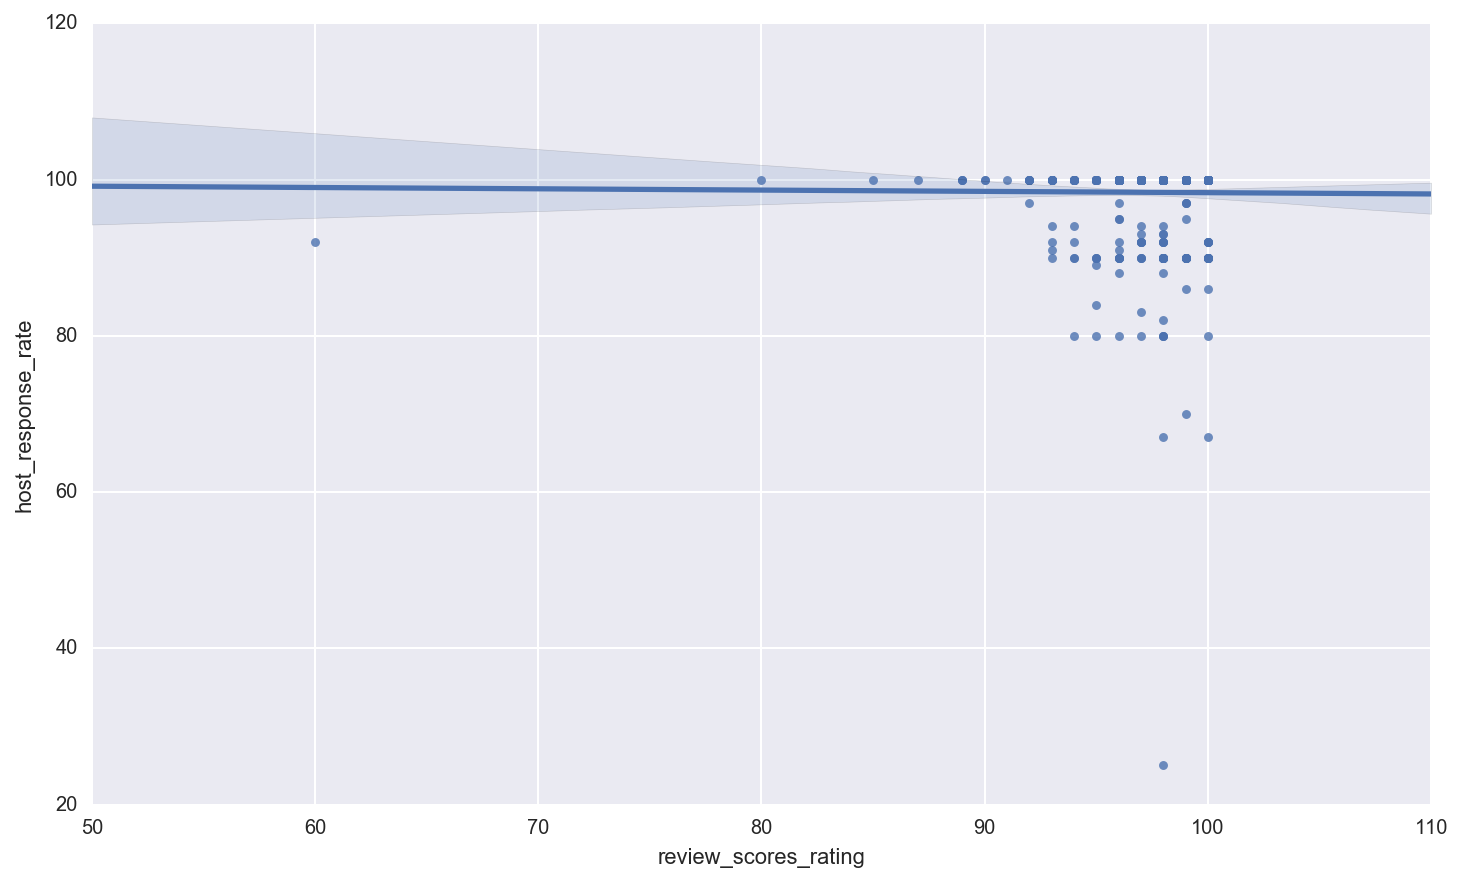

In [424]:
plt.figure(figsize=(12,7))
sns.regplot(x=sf_superhosts.review_scores_rating, y = sf_superhosts.host_response_rate, data = sf_superhosts)

# Non Superhosts review scores vs response rate

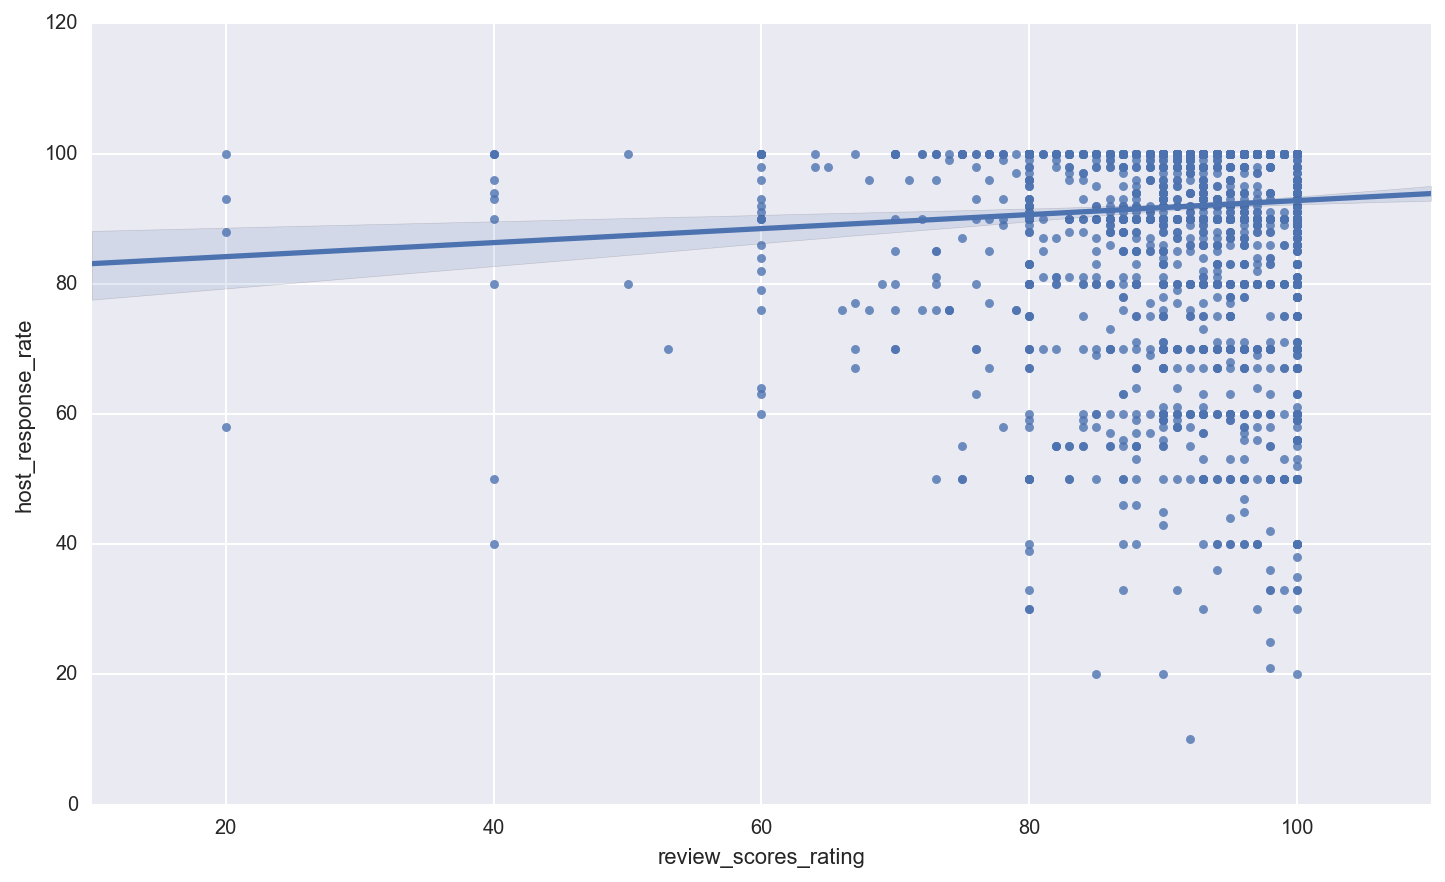

In [425]:
plt.figure(figsize=(12,7))
sns.regplot(x=sf_non_superhosts.review_scores_rating, y = sf_non_superhosts.host_response_rate, data = sf_non_superhosts)

# Patsy for Feature Importances

In [468]:
#Solely used this function to see which features were most important using decison tree classifier 
def verifying(location):
    #Created a formula to subset categorical variables as values
    import patsy
    formula = 'host_is_superhost ~ host_acceptance_rate + C(host_has_profile_pic) + C(host_identity_verified) \
               + availability_365 + C(instant_bookable) + C(cancellation_policy) + C(require_guest_profile_picture)\
               + C(require_guest_phone_verification) + host_total_listings_count + C(is_location_exact) + C(room_type)\
               + price + host_response_rate + reviews_per_month\
               + host_listings_count + review_scores_rating + review_scores_accuracy + review_scores_cleanliness\
               + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value - 1' 

    ymat, xmat = patsy.dmatrices(formula, data=location, return_type='dataframe')
    
    #Normalize data
    cols = [x for x in xmat.columns if x not in 'host_is_superhost']
    xmat.ix[:,cols] = (xmat.ix[:,cols] - xmat.ix[:,cols].mean())/xmat.ix[:,cols].std()
    xmat = xmat.ix[:,cols]

    #Fit all features using a decison tree solely for determining FEATURE IMPORTANCES
    dtc = DecisionTreeClassifier()
    dtc.fit(xmat, ymat)

    features = pd.DataFrame({'feature':xmat.columns, 'importance':dtc.feature_importances_}).sort_values(by=['importance'],\
                                                                                                         ascending=False)
    return features

sf_features = verifying(sf)
sf_features

feature  importance
18                          reviews_per_month    0.266897
20                       review_scores_rating    0.189784
16                                      price    0.118969
14                           availability_365    0.109797
13                       host_acceptance_rate    0.065895
17                         host_response_rate    0.061163
15                  host_total_listings_count    0.022862
19                        host_listings_count    0.020884
4          C(cancellation_policy)[T.moderate]    0.016107
26                        review_scores_value    0.015358
2            C(host_identity_verified)[T.1.0]    0.014675
25                     review_scores_location    0.014495
21                     review_scores_accuracy    0.013383
22                  review_scores_cleanliness    0.012033
5            C(cancellation_policy)[T.strict]    0.011717
8       C(require_guest_profile_picture)[T.1]    0.009923
9    C(require_guest_phone_verification)[T.1]    0.009621
3                    C(instant_bookable)[T.1]    0.006696
24                review_scores_communication    0.005326
10                  C(is_location_exact)[T.1]    0.005106
11               C(room_type)[T.Private room]    0.003762
23                      review_scores_checkin    0.003143
12                C(room_type)[T.Shared room]    0.001310
0                C(host_has_profile_pic)[0.0]    0.001092
6   C(cancellation_policy)[T.super_strict_30]    0.000000
7   C(cancellation_policy)[T.super_strict_60]    0.000000
1                C(host_has_profile_pic)[1.0]    0.000000

# Updated Data for analysis

In [461]:
def new_data(location_df):    
    location = location_df[['host_acceptance_rate','availability_365','host_total_listings_count',
                        'host_is_superhost','review_scores_rating','price','host_response_rate',
                        'reviews_per_month']]


    #Converting price
    location.price = location.price.apply(lambda x: str(x))
    location.price = location.price.apply(lambda x: x.replace("$",""))
    location.price = location.price.apply(lambda x: x.replace(",",""))
    location.price = location.price.apply(lambda x: float(x))

    #Converting percentage
    location.host_response_rate = location.host_response_rate.apply(lambda x: str(x))
    location.host_response_rate =  location.host_response_rate.apply(lambda x: x.replace("%",""))
    location.host_response_rate = location.host_response_rate.apply(lambda x: np.NaN if x =='nan' else float(x))

    #Converting host acceptance rate
    location.host_acceptance_rate = location.host_acceptance_rate.apply(lambda x: str(x))
    location.host_acceptance_rate = location.host_acceptance_rate.apply(lambda x: float(x.replace("%","")))

    #Cleaning and converting True and False 
    location.host_is_superhost = location.host_is_superhost.apply(lambda x: 1 if x == 't' else 0 if x =='f' else x)

    #Drop all null Nan values
    location = location.dropna()
    return location

sf_analysis = new_data(san_francisco_listings_gz) #ADD LOCATION HERE!!!!
#new_data

# Confusion Matrix function 

In [462]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# kNN 

Baseline Accuracy: 0.148235757934
ROC_AUC score: 0.686463133157
Average Precision: 0.276108432224
KNN Score: 0.849552238806
                   precision    recall  f1-score   support

Is NOT Super Host       0.85      0.99      0.92      1422
    Is Super Host       0.53      0.04      0.07       253

      avg / total       0.80      0.85      0.79      1675

Confusion matrix
[[1414    8]
 [ 244    9]]


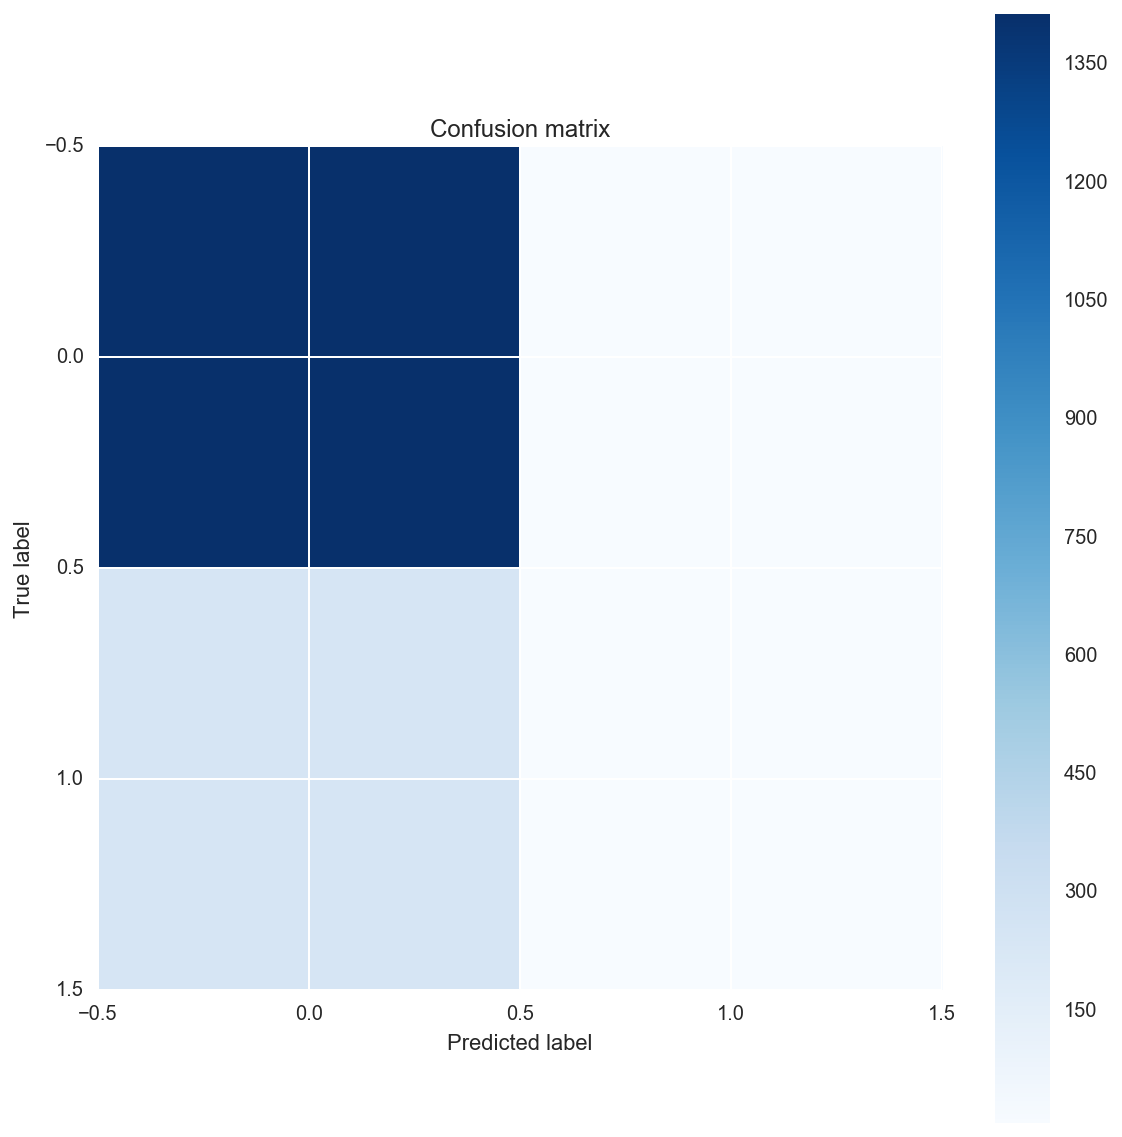

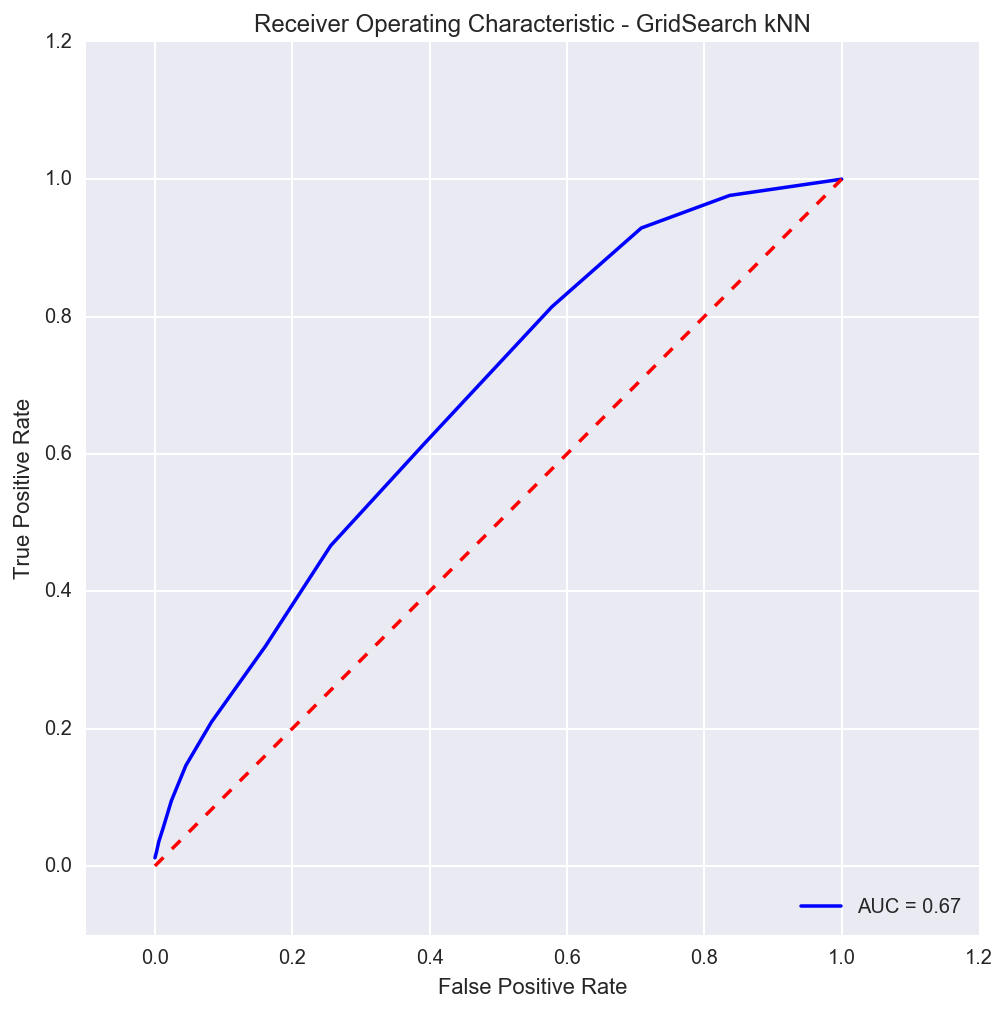

In [463]:
def knn(location):
    
    cols = [x for x in location.columns if x not in 'host_is_superhost']

    y = location.host_is_superhost.values
    x = location[cols].values
    
    x = (x - x.mean())/x.std()


    #Baseline Accuracy
    print "Baseline Accuracy:", np.mean(y)
    
    #Logistic Regression with Logistic Score
    from sklearn.cross_validation import cross_val_score
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')
    
    #Cross Validating score with roc_auc
    scores = cross_val_score(knn, x, y, cv=5, scoring='roc_auc')
    print "ROC_AUC score:", np.mean(scores)
    
    #Cross Validating score with average precision
    scores = cross_val_score(knn, x, y, cv=5, scoring='average_precision')
    print "Average Precision:", np.mean(scores)
    
    X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.33)
    
    knn.fit(X_train,Y_train)
    
    y_true, y_pred = Y_test, knn.predict(X_test)
    
    print "KNN Score:",knn.score(X_test,Y_test)
    
    print classification_report(y_true, y_pred, target_names=["Is NOT Super Host", "Is Super Host"])
    
    from sklearn.metrics import roc_curve, auc

    predicted = knn.predict_proba(X_test)[:, 1]
    
    cm = confusion_matrix(Y_test, y_pred)
    np.set_printoptions(precision=2)
    print('Confusion matrix')
    print(cm)
    plt.figure(1)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cm)
    
    false_p_rate, true_p_rate, thresholds = roc_curve(Y_test, predicted)
    roc_auc = auc(false_p_rate, true_p_rate)

    plt.figure(2)
    plt.figure(figsize=(8,8))
    plt.title('Receiver Operating Characteristic - GridSearch kNN')
    plt.plot(false_p_rate, true_p_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
knn(sf_analysis)

# Logistic Regression with L1 Penalty

Baseline Accuracy: 0.148235757934
ROC_AUC score: 0.805765076587
Average Precision: 0.35916263188
Logistic Score: 0.848955223881
                   precision    recall  f1-score   support

Is NOT Super Host       0.85      1.00      0.92      1423
    Is Super Host       0.43      0.01      0.02       252

      avg / total       0.79      0.85      0.78      1675

Confusion matrix
[[1419    4]
 [ 249    3]]


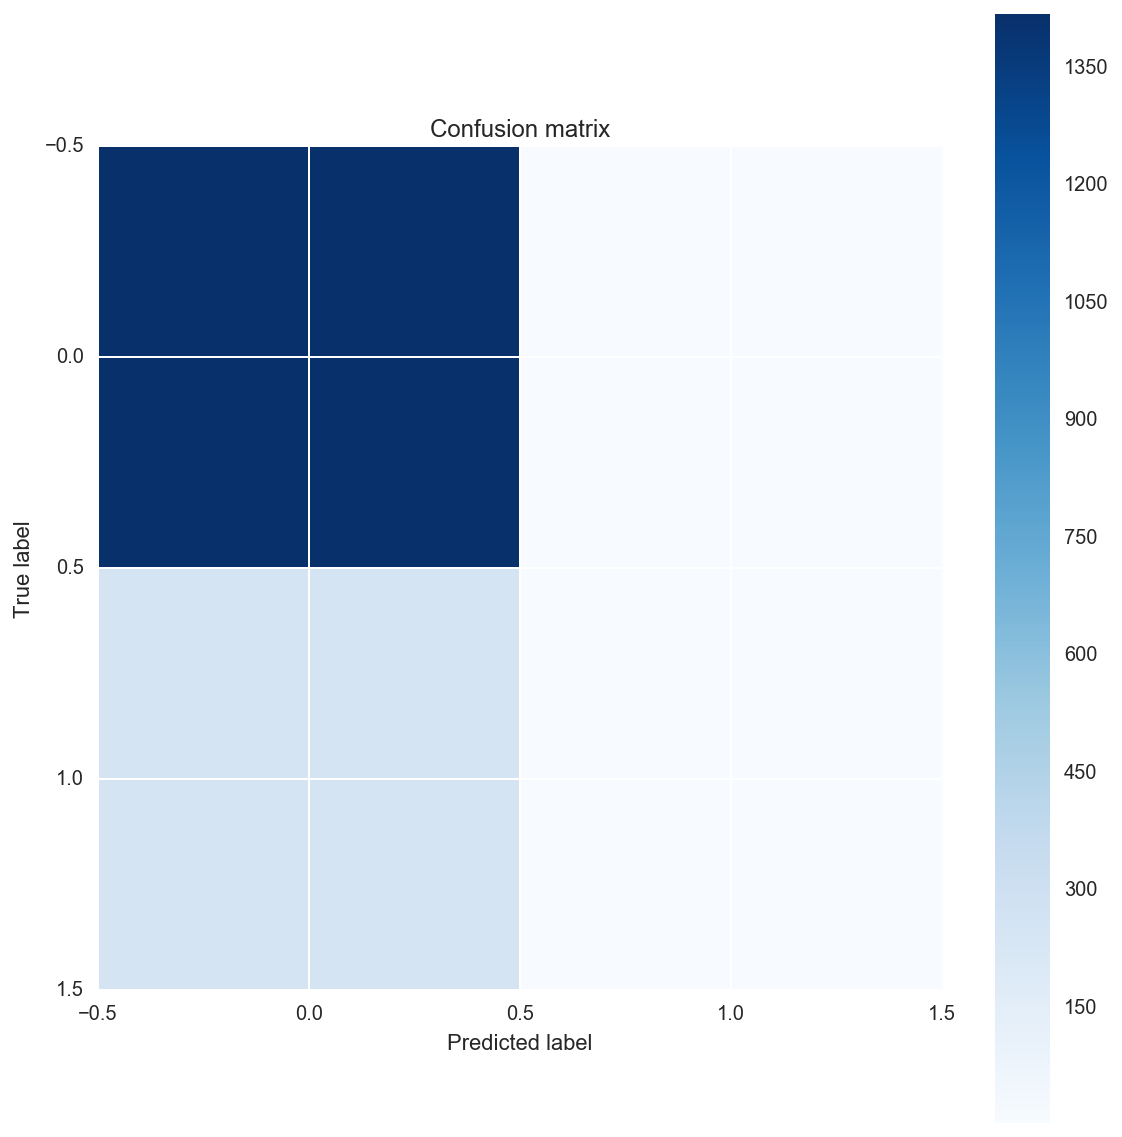

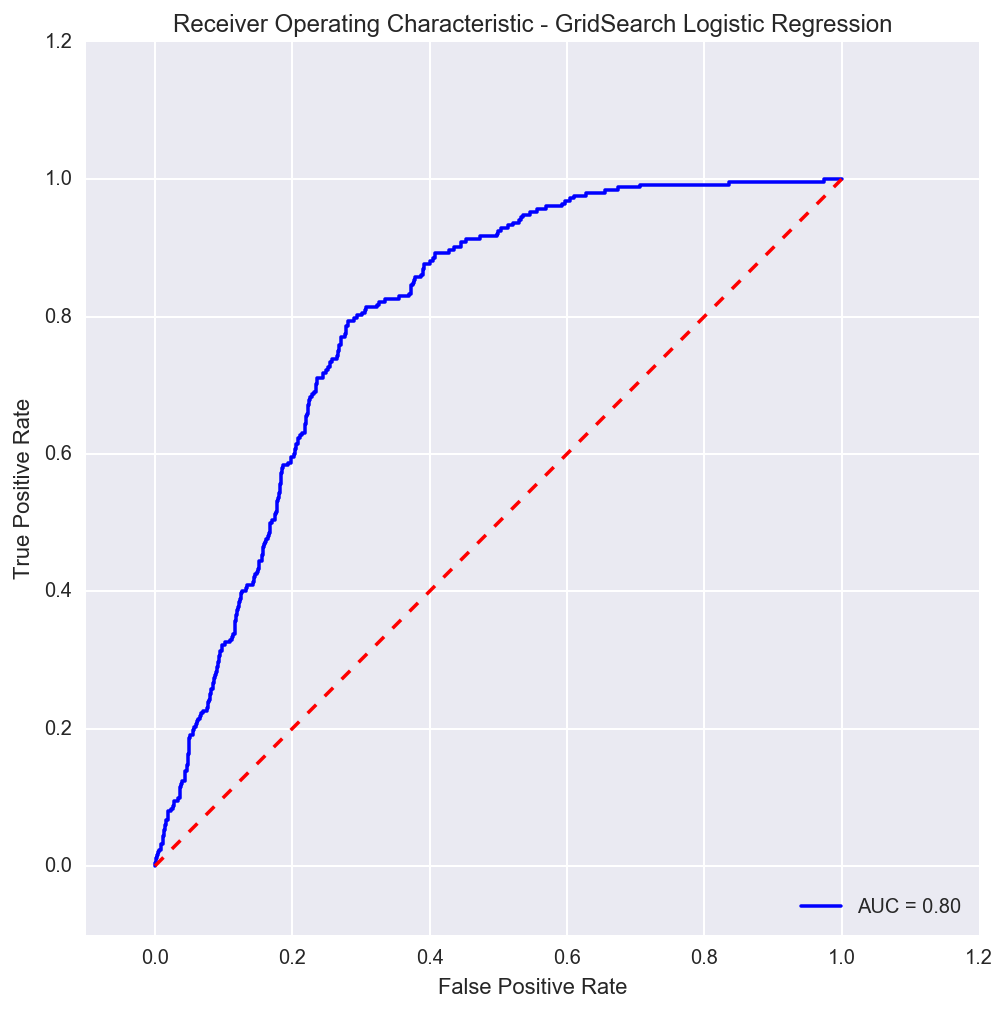

In [466]:
def logistic(location):
    
    cols = [x for x in location.columns if x not in 'host_is_superhost']

    y = location.host_is_superhost.values
    x = location[cols].values
    
    x = (x - x.mean())/x.std()


    #Baseline Accuracy
    print "Baseline Accuracy:", np.mean(y)
    
    #Logistic Regression with Logistic Score
    from sklearn.cross_validation import cross_val_score
    log_reg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=2, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
    
    #Cross Validating score with roc_auc
    scores = cross_val_score(log_reg, x, y, cv=5, scoring='roc_auc')
    print "ROC_AUC score:", np.mean(scores)
    
    #Cross Validating score with average precision
    scores = cross_val_score(log_reg, x, y, cv=5, scoring='average_precision')
    print "Average Precision:", np.mean(scores)
    
    search_parameters = {
            "penalty":          ['l1','l2'],
            "C":                [1.0, 5, 10],  # Regularization paramter
            "fit_intercept":    [False, True], # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
            "class_weight":     [None, "balanced"], # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
            "intercept_scaling":[2, 1],        # Useful only if solver is liblinear. when self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling is appended to the instance vector. 
            "solver":           ['liblinear']
        }
    
    X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.33)
    
    log_reg.fit(X_train,Y_train)
    
    print "Logistic Score:",log_reg.score(X_test,Y_test)
    
    y_true, y_pred = Y_test, log_reg.predict(X_test)
    print classification_report(y_true, y_pred, target_names=["Is NOT Super Host", "Is Super Host"])
    
    #print confusion_matrix(y_true, y_pred)
    
    from sklearn.metrics import roc_curve, auc

    predicted = log_reg.predict_proba(X_test)[:, 1]
    
    cm = confusion_matrix(Y_test, y_pred)
    np.set_printoptions(precision=2)
    print('Confusion matrix')
    print(cm)
    plt.figure(1)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cm)
    
    false_p_rate, true_p_rate, thresholds = roc_curve(Y_test, predicted)
    roc_auc = auc(false_p_rate, true_p_rate)

    plt.figure(2)
    plt.figure(figsize=(8,8))
    plt.title('Receiver Operating Characteristic - GridSearch Logistic Regression')
    plt.plot(false_p_rate, true_p_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
logistic(sf_analysis)

# Decision Tree Classifier

Baseline Accuracy: 0.148235757934
ROC_AUC score: 0.840975353362
Average Precision: 0.445122101634
Decision Tree Score: 0.867462686567
                   precision    recall  f1-score   support

Is NOT Super Host       0.89      0.97      0.93      1444
    Is Super Host       0.55      0.23      0.32       231

      avg / total       0.84      0.87      0.84      1675

Confusion matrix
[[1400   44]
 [ 178   53]]


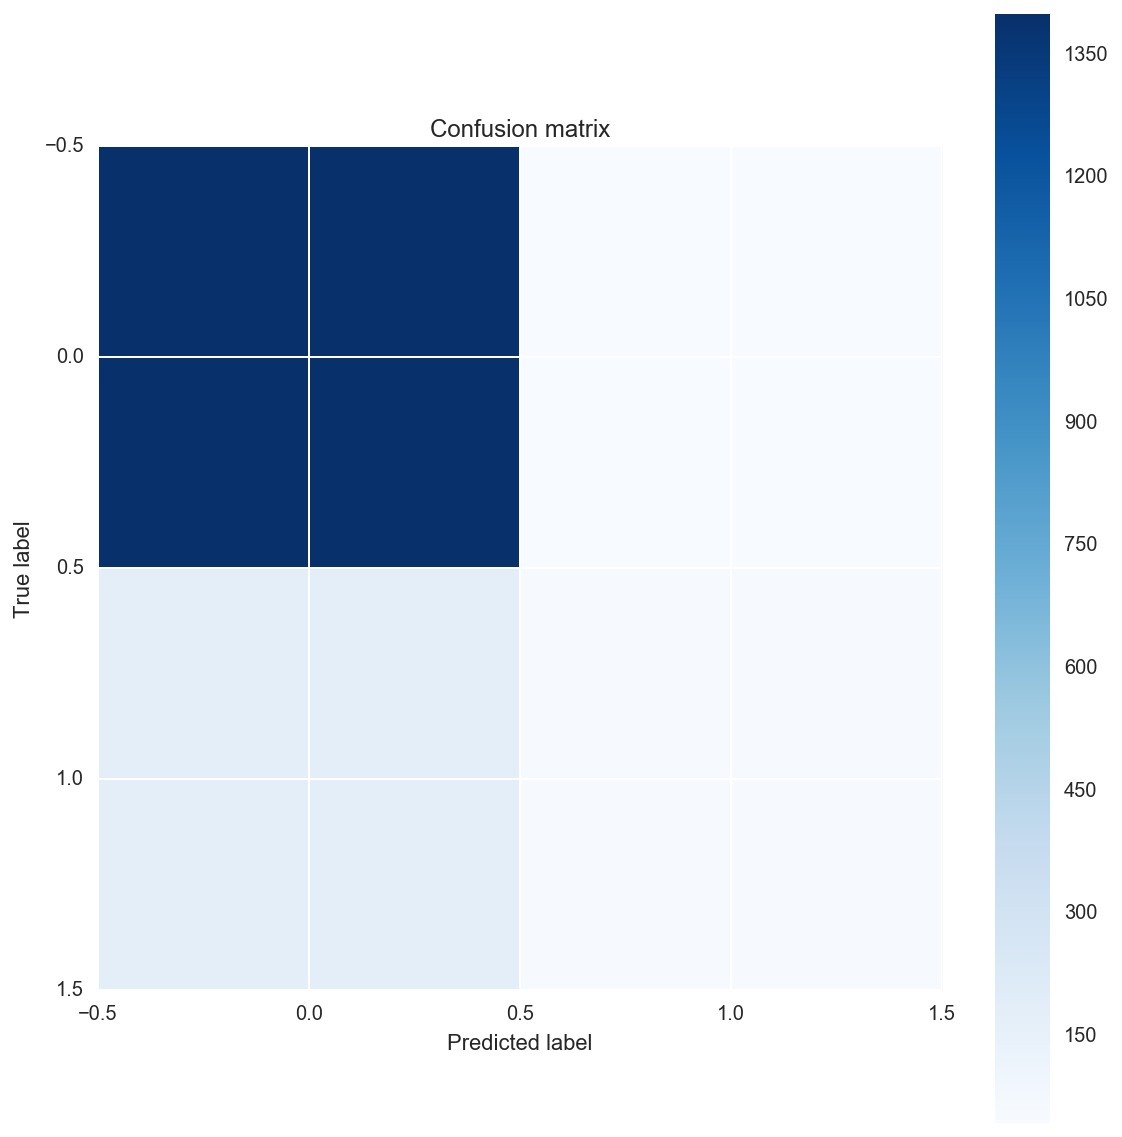

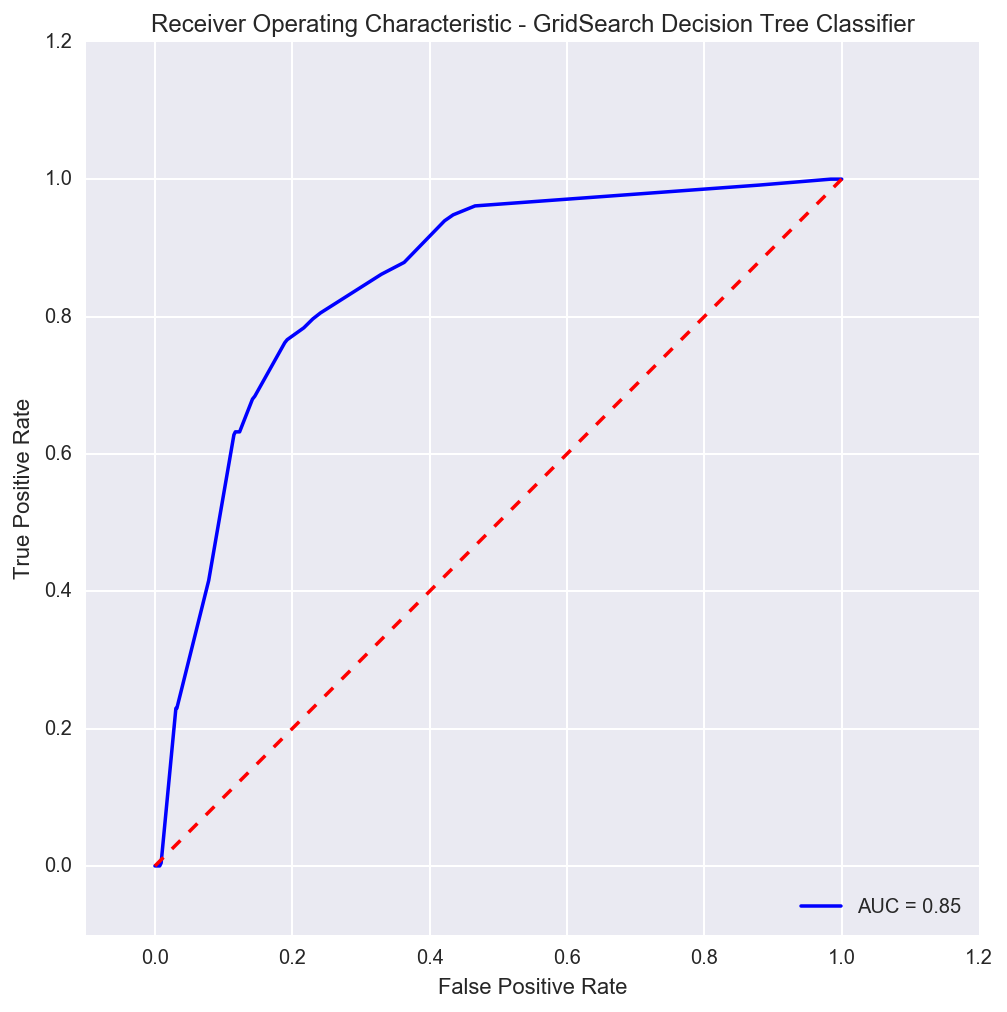

In [465]:
def decision_tree(location):
    
    cols = [x for x in location.columns if x not in 'host_is_superhost']

    y = location.host_is_superhost.values
    x = location[cols].values
    
    x = (x - x.mean())/x.std()

    
    #Baseline Accuracy
    print "Baseline Accuracy:", np.mean(y)
    
    dtc_gs = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                                max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
                                min_samples_split=10, min_weight_fraction_leaf=0.0,
                                presort=False, random_state=None, splitter='best')

     #Cross Validating score with roc_auc
    scores = cross_val_score(dtc_gs, x, y, cv=5, scoring='roc_auc')
    print "ROC_AUC score:", np.mean(scores)
    
    #Cross Validating score with average precision
    scores = cross_val_score(dtc_gs, x, y, cv=5, scoring='average_precision')
    print "Average Precision:", np.mean(scores)
    
    dtc_params = {
        'max_depth': [None, 3,4,5,6,7,8,9],
        'max_features': [None, 'auto'],
        'min_samples_split':[2,5,10,15]
    }
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.33)
    
    dtc_gs.fit(X_train, np.ravel(Y_train))
    
    y_true, y_pred = Y_test, dtc_gs.predict(X_test)
    
    print "Decision Tree Score:",dtc_gs.score(X_test,Y_test)

    print classification_report(y_true, y_pred, target_names=["Is NOT Super Host", "Is Super Host"])
    
    #print confusion_matrix(y_true, y_pred)
    
    from sklearn.metrics import roc_curve, auc

    predicted = dtc_gs.predict_proba(X_test)[:, 1]
    
    cm = confusion_matrix(Y_test, y_pred)
    np.set_printoptions(precision=2)
    print('Confusion matrix')
    print(cm)
    plt.figure(1)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cm)
    
    false_p_rate, true_p_rate, thresholds = roc_curve(Y_test, predicted)
    roc_auc = auc(false_p_rate, true_p_rate)

    plt.figure(2)
    plt.figure(figsize=(8,8))
    plt.title('Receiver Operating Characteristic - GridSearch Decision Tree Classifier')
    plt.plot(false_p_rate, true_p_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
decision_tree(sf_analysis)

# Super Host Map

In [418]:
from folium.map import Popup, Icon, Marker
import folium
from folium import plugins

location = pd.read_csv('./datasets/capstone_data_airbnb/san_francisco_california/listings.csv.gz')

#Converting price
location.price = location.price.apply(lambda x: x.replace("$",""))
location.price = location.price.apply(lambda x: x.replace(",",""))
location.price = location.price.apply(lambda x: float(x))


my_new_location = location[location['host_is_superhost'] == 't'][['longitude','latitude','host_total_listings_count']].dropna()

m = folium.Map(location = [37.7599, -122.431297], tiles = 'Cartodb Positron', zoom_start = 12, min_zoom = 12, max_zoom = 15)


folium.GeoJson(open('./datasets/capstone_data_airbnb/san_francisco_california/neighbourhoods.geojson'),style_function=lambda feature: {'color': 'blue', 'weight':3,'dashArray':'5,5'}).add_to(m)

marker_cluster = folium.MarkerCluster("YOLO").add_to(m)
for each in my_new_location[0:1000].iterrows():
    #print each[1]['Category'], each[1]['DayOfWeek'], each['Time']
    popup = str('# bookings: ' + str(each[1]['host_total_listings_count']))
    folium.Marker(location = [each[1]['latitude'],each[1]['longitude']],popup=popup).add_to(marker_cluster)
    
m

# Non Super Host Map

In [419]:
from folium.map import Popup, Icon, Marker
import folium
from folium import plugins

location = pd.read_csv('./datasets/capstone_data_airbnb/san_francisco_california/listings.csv.gz')

#Converting price
location.price = location.price.apply(lambda x: x.replace("$",""))
location.price = location.price.apply(lambda x: x.replace(",",""))
location.price = location.price.apply(lambda x: float(x))


my_new_location = location[location['host_is_superhost'] == 'f'][['longitude','latitude','host_total_listings_count']].dropna()

m = folium.Map(location = [37.7599, -122.431297], tiles = 'Cartodb Positron', zoom_start = 12, min_zoom = 12, max_zoom = 15)


folium.GeoJson(open('./datasets/capstone_data_airbnb/san_francisco_california/neighbourhoods.geojson'),style_function=lambda feature: {'color': 'blue', 'weight':3,'dashArray':'5,5'}).add_to(m)

marker_cluster = folium.MarkerCluster("YOLO").add_to(m)
for each in my_new_location[0:1000].iterrows():
    #print each[1]['Category'], each[1]['DayOfWeek'], each['Time']
    popup = str('# bookings: ' + str(each[1]['host_total_listings_count']))
    folium.Marker(location = [each[1]['latitude'],each[1]['longitude']],popup=popup).add_to(marker_cluster)
    
m